# Computational Methods in Economics

## Tutorial 2c - Numpy and Matplotlib - Solution to Classroom Exercises

In [1]:
# Authors: Alex Schmitt (schmitt@ifo.de)

import datetime
print('Last update: ' + str(datetime.datetime.today()))

Last update: 2019-11-06 11:41:32.628876


### Exercise 1
(a) Create a random vector with five elements and print the average of the vector. Then, replace the maximum value by 0 and print the vector and its average again.

(b) Use NumPy's **random** package to get N draws from a standard normal distribution (google to get the name of the corresponding function and its syntax!) and store them in a NumPy array. Find the sample average and standard deviation for **N = 10**, **N = 1000** and **N = 1000000**.


In [2]:
import numpy as np

In [3]:
## question (a)
import random
A = np.zeros(5)
for i in range(5):
    A[i] = random.random()
# A=np.random.uniform(0,1,5) #Alternative
print(A)
print(A.mean())

A[A.argmax()]=0
print(A)
print(A.mean())

[0.37309672 0.79576618 0.2940078  0.65310305 0.76070009]
0.5753347677041841
[0.37309672 0.         0.2940078  0.65310305 0.76070009]
0.41618153209475056


In [4]:
## question (b)
N = [10, 1000, int(1e+6)]

for item in N:
    A = np.random.normal(0, 1, item)
    ave = A.mean() 
    dev = A.std()
    print("For N = {}, the mean is {} and the standard deviation is {}.".format(item, ave, dev))

For N = 10, the mean is 0.3816438648828141 and the standard deviation is 0.9539154722590459.
For N = 1000, the mean is -0.0613563972045299 and the standard deviation is 0.9985102887358521.
For N = 1000000, the mean is 0.0006748150343004154 and the standard deviation is 0.9989401328313972.


### Exercise 2


(a) For the last case in question 1(b) with **N = 1000000**, use an index array or Numpy's **where** function to find the share of draws that is either less than -1.96 or greater than 1.96. What's your expectation what this share should be?

(b) Create a two-dimensional 4-by-4 NumPy array **Ar** with elements from 1 to 16. A quick way to do is using Python **range** function and the **shape** method of NP arrays. Recall from linear algebra that multiplying any matrix with the identity matrix **Id** just results in same matrix (i.e. $I \cdot Ar = Ar \cdot I = Ar$). Confirm this using your array **Ar**. What happens if you multiply **Ar** with an array of the same dimension that consists only of 1s?

(c) Write a function **get_diag** that takes a *square* matrix of dimension **nn** and returns a flat array of length **nn** that contains the elements on the matrix' diagonal. The first thing the function should do is checking if the input is a square array and give an error message otherwise. You could this in many ways; one neat option is an **assert** statement (check the documentation!). Alternatively, you could use a print statement and interrupt the function with **Return None**.

In [5]:
## question (a)
N = int(1e+6)
A = np.random.normal(0, 1, N)
## use a combination of two index arrays
A_sub = A[(A > 1.96) | (A < - 1.96)] 
## find share of complete sample
x = len(A_sub) / N

## alternative here:
# x = len( A[A > 1.96] ) + len( A[A < - 1.96] ) / N

print("The share of draws less than -1.96 or greater than 1.96 is {}.".format(x))

The share of draws less than -1.96 or greater than 1.96 is 0.050031.


In [8]:
## question (b)

## create matrix Ar
Ar = np.array(range(1, 17))
Ar.shape = (4,4)
## create identity matrix and ones matrix
Id = np.eye(4)
E = np.ones((4,4))
## multiplying with identity matrix returns A
print(Id @ Ar)
print(Ar @ Id)
## multiplying with ones matrix returns row and column sums, respectively
print(E @ Ar) 
print(Ar @ E) 

[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]
 [13. 14. 15. 16.]]
[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]
 [13. 14. 15. 16.]]
[[28. 32. 36. 40.]
 [28. 32. 36. 40.]
 [28. 32. 36. 40.]
 [28. 32. 36. 40.]]
[[10. 10. 10. 10.]
 [26. 26. 26. 26.]
 [42. 42. 42. 42.]
 [58. 58. 58. 58.]]


In [10]:
## question (c)

def get_diag(A):
    
    assert A.shape[0] == A.shape[1], "The matrix must be square!"
    
    ## Alternative:
#     if not A.shape[0] == A.shape[1]:
#         print("The matrix must be square!")
#         return None
    
    nn = A.shape[0]
    D = np.zeros(nn)
    
    for ind in range(nn):
        D[ind] = A[ind, ind]
    
    return D

print(get_diag(Ar))

## test with a non-square matrix
B = np.array([[1,2,3]])
# print(get_diag(B))

[ 1.  6. 11. 16.]


### Exercise 3

(a) Draw the function $y=log(x)$ on the interval from 1 to 10

(b) Draw the function $y=x^3$ on the interval from -10 to 10. Compile the plot once with N=5 and with N=100 individual values for the x-axis, both in the same figure. Set two different colors for the to lines.


In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

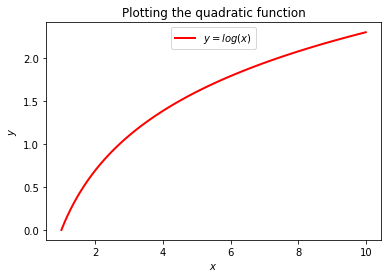

In [12]:
## (a) N=5
x = np.linspace(1,10,100)
y = np.log(x)

fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label = '$y = log(x)$')
ax.set_title('Plotting the quadratic function')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend(loc = 'upper center')

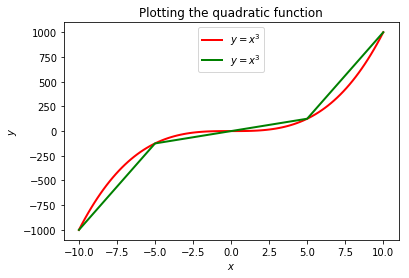

In [13]:
## (b) N=100
x100 = np.linspace(-10,10,100)
y100 = x100**3
x5 = np.linspace(-10,10,5)
y5 = x5**3

fig, ax = plt.subplots()
ax.plot(x100, y100, 'r-', linewidth=2, label = '$y = x^3$')
ax.plot(x5, y5, 'g-', linewidth=2, label = '$y = x^3$')
ax.set_title('Plotting the quadratic function')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend(loc = 'upper center')

### Question 4

The file *Capacities.csv* contains country-level data on electricity generation capacity, and more specifically on capacity of "clean" (i.e. non-carbon emitting) technologies. It consists of three columns: the first columns contains the combined capacity for hydro and nuclear power plants, while the second columns contains the combined capacity for wind and solar installations (all in TW). The third columns contains the overall *capacity factor*, that is, the share of potential electricity that is actually produced. In other words, a capacity factor of 50% would imply that the a plant runs half of the time. In this question, we are interested in how the capacity factor depends on how wind and solar capacity are in the system.

(a) Each column consists of 600 *country-year* observations (30 OECD countries over 20 years). Use Numpy's **loadtxt** function to load the data as a 600-by-3 array. (A side note: there are better ways to work with this kind of data in Python than a Numpy array, as we will see in next lecture).

(b) Visualize the data using a scatter plot, where each axis corresponds to a capacity measure, while the color (or the size) of the markers is determined by the level of the capacity factor.

(c) If you are not interested in absolute capacity levels, an alternative is to plot the capacity factor against the *relative* capacity of wind and solar, i.e. their share in total renewable capacity. Use Matplotlib's **plot** method, but with markers instead of lines. Also, include only those observations that have a wind & solar share of more than 1 percent (Hint: use a logical Nunpy array).

In [18]:
## (a)
X = np.loadtxt('data/Capacities.csv')

cap_hn = X[:,0]
cap_ws = X[:,1]
cf_rn = X[:,2]

Text(0, 0.5, 'Capacity Wind & Solar')

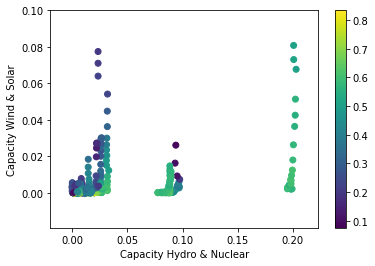

In [19]:
## (b)

fig, ax = plt.subplots()
im = ax.scatter(cap_hn, cap_ws, c = cf_rn, cmap='viridis')
fig.colorbar(im);  # show color scale
ax.set_xlabel('Capacity Hydro & Nuclear')
ax.set_ylabel('Capacity Wind & Solar')

Text(0, 0.5, 'Capacity Factor')

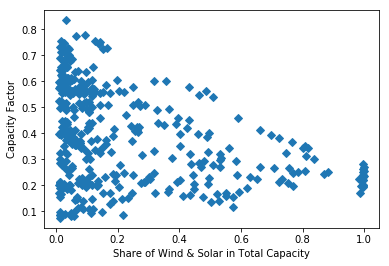

In [20]:
## (c)

## get relative capacity of wind + solar
sh_ws = (cap_ws / (cap_hn + cap_ws))

fig, ax = plt.subplots()
## Use logical arrays to exclude observations where sh_ws < 0.01
ax.plot(sh_ws[sh_ws >= 0.01], cf_rn[sh_ws >= 0.01], 'D')
ax.set_xlabel('Share of Wind & Solar in Total Capacity')
ax.set_ylabel('Capacity Factor')